# Understanding Decadal Variabilities in sea level

In [2]:
%load_ext ferretmagic

### PDO index downloded from 
"https://climatedataguide.ucar.edu/climate-data/pacific-decadal-oscillation-pdo-definition-and-indices"
### NPGO index downloded from 
"http://www.o3d.org/npgo/"

## Load AVISO data and the Decadal indices 

In [3]:
%%ferret
use Data/AVISO_yearly_1x1deg_Global_1993_2019.nc
use Data/AVISO_glo_trend.nc
! Index
use Data/Index/PDO_index.nc
use Data/index/NPGO_index.nc
! Tide Gauge
use Data/TG/Kanton_d013.nc

### In literature : Han et al., 2019 : Impacts of Basin-Scale Climate Modes on Coastal Sea Level: a Review
 ![aviso sea level](Images/Decadal_sealevel.png)


### Pacific Decadal Oscillation (PDO; Mantua et al. 1997; Zhang et al. 1997)
PDO is defined as the first empirical orthogonal function (EOF) of monthly sea surface temperature (SST) anomalies in the North Pacific (north of 20°N; with time series of global mean SST removed)



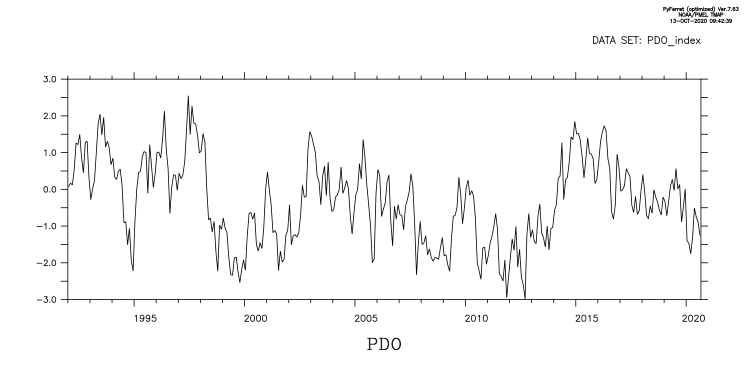

In [4]:
%%ferret
set region/t=01-jan-1992:31-dec-2020
set win/asp=.5
pl pdo[d=3]

### North Pacific Gyre Oscillation (NPGO; Di Lorenzo et al. 2008)
The NPGO is defined as the sec- ond EOF of sea surface height anomalies over (180°–110°W, 25°–62°N) of the Northeast Pacific (Di Lorenzo et al. 2008).


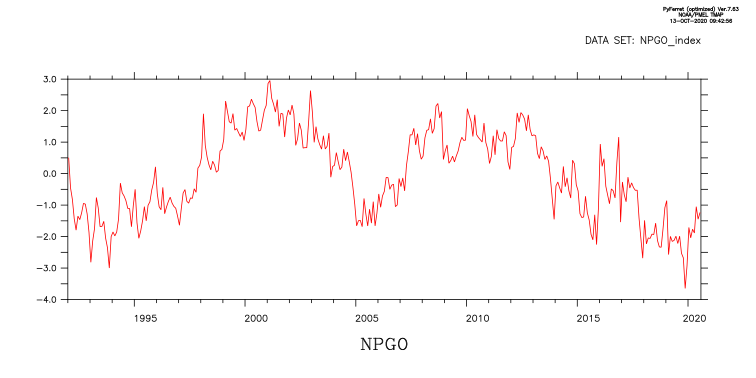

In [6]:
%%ferret
set region/t=01-jan-1992:31-dec-2020
set win/asp=.5
pl/color=red npgo[d=4]

### comparison between PDO and NPGO


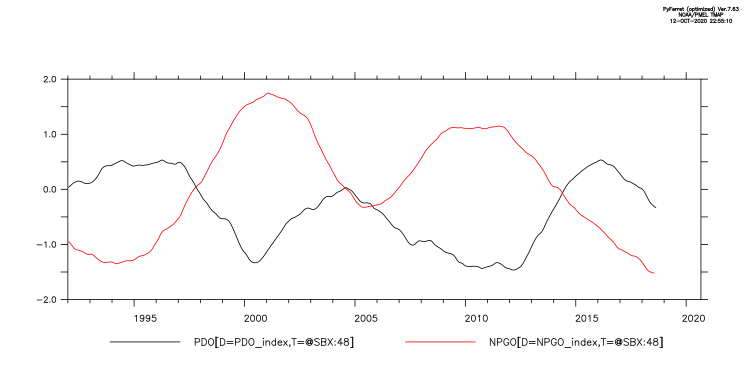

In [24]:
%%ferret
set region/t=01-jan-1992:31-dec-2020
set win/asp=.5
pl pdo[d=3,l=@sbx:48],npgo[d=4,l=@sbx:48]

## Correlation between PDO vs sea level 

! Enter_GO variance
... Variance and Covariance: Instructions:
Use the LET/QUIET command to define the variable(s) P (and Q) as
your variable(s) of interest (e.g. yes? LET/QUIET P = u[x=180,y=0])
The variance of P will be variable P_VAR (Q --> Q_VAR)
The covariance will be COVAR The correlation will be CORREL.
Type GO VAR_N to obtain n/n+1 statistical correction factor
...
! Exit_GO
! Enter_GO land 7
! Exit_GO


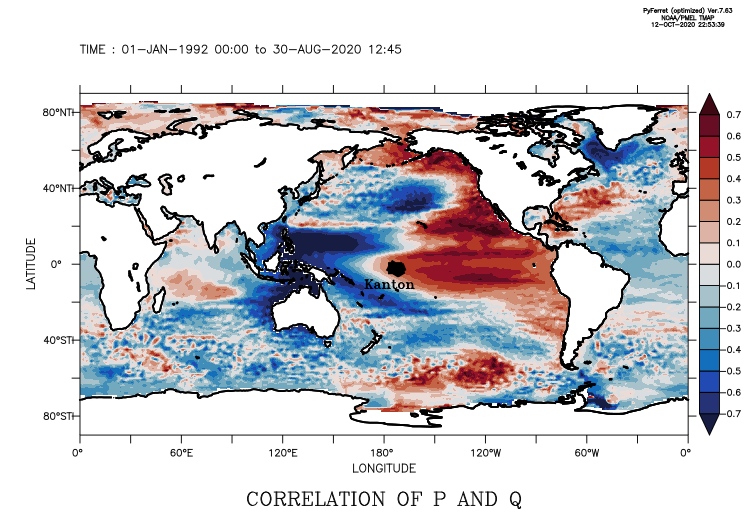

In [18]:
%%ferret
let  p = pdo[l=@sbx:48,d=3] ; let q = sla[d=1,l=@sbx:4,gt=pdo[d=3]] ; go variance 
set win/asp=.7
palette cmocean_balance
fill/lev=(-inf)(-0.7,0.7,0.1)(inf) correl ; go land 7
plot/vs/over/nolab/thick=13/sym=88/color=black  lon[d=5],lat[d=5]
label `lon[d=5]-5`,`lat[d=5]-10`,0,0,0.13 @TRKanton


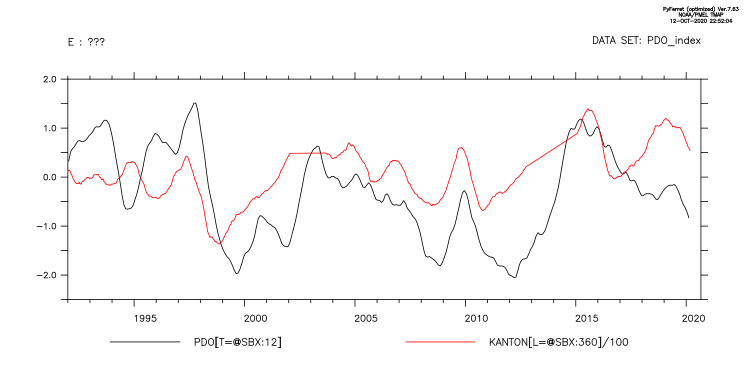

In [15]:
%%ferret
set region/t=01-jan-1992:31-dec-2020
set win/asp=.5
let Kanton = sea_level[d=5,l=@fln:3]-sea_level[d=5,l=@ave]
pl pdo[d=3,l=@sbx:12],kanton[l=@sbx:360]/100

## Regression between PDO vs sea level 

! Enter_GO regresst
... Linear Regression Along the T Axis
... Instructions:
Use the LET command to define new variables
Define the variable P as your independent (X) variable
Define the variable Q as your dependent (Y) variable
Results will be variables "SLOPE", "INTERCEP" and "RSQUARE"
QHAT will be the regression estimate
Note: If "T" is your independent variable then
... "SET GRID Q" after defining Q.
...
! Exit_GO
! Enter_GO land 7
! Exit_GO


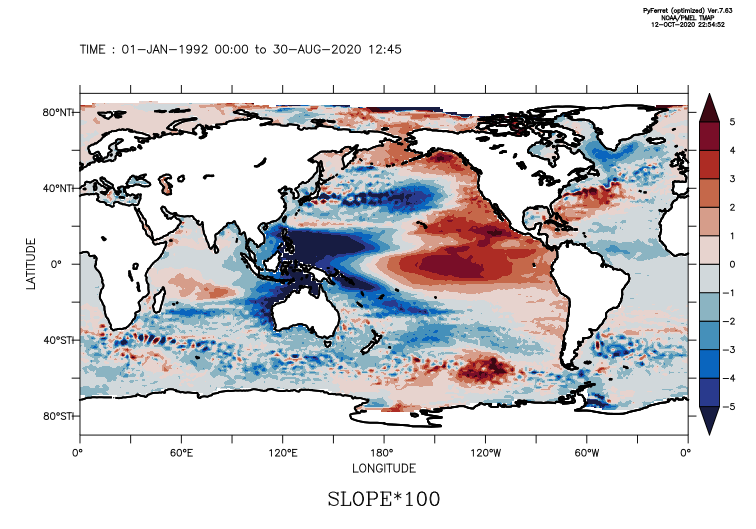

In [23]:
%%ferret
let P = pdo[l=@sbx:48,d=3] ; let q = sla[d=1,l=@sbx:4,gt=pdo[d=3]] ; go regresst
set win/asp=.7
palette cmocean_balance
fill/lev=(-inf)(-5,5,1)(inf) slope*100
go land 7

## Time series comparison between PDO and a location at West Pacific


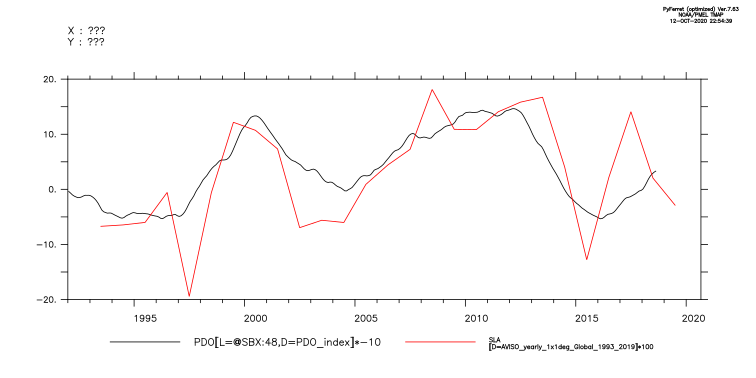

In [22]:
%%ferret
set win/asp=.5
plot/x=140/y=10 pdo[l=@sbx:48,d=3]*-10,sla[d=1]*100

## Correlation between NPGO vs sea level 

! Enter_GO variance
... Variance and Covariance: Instructions:
Use the LET/QUIET command to define the variable(s) P (and Q) as
your variable(s) of interest (e.g. yes? LET/QUIET P = u[x=180,y=0])
The variance of P will be variable P_VAR (Q --> Q_VAR)
The covariance will be COVAR The correlation will be CORREL.
Type GO VAR_N to obtain n/n+1 statistical correction factor
...
! Exit_GO
! Enter_GO land 7
! Exit_GO


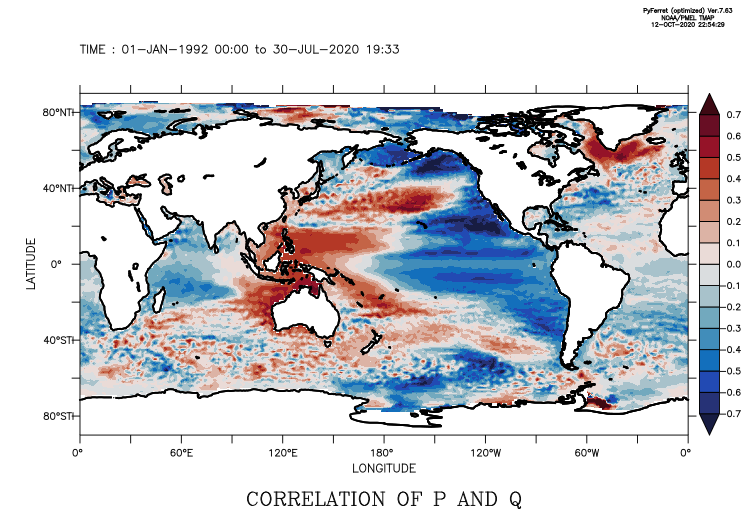

In [20]:
%%ferret
let p = npgo[l=@sbx:48,d=4] ; let q = Sla[d=1,l=@sbx:4,gt=npgo[d=4]] ;go variance
set win/asp=.7
palette cmocean_balance
fill/lev=(-inf)(-0.7,0.7,0.1)(inf) correl ;go land 7

## Regression between NPGO vs sea level 

! Enter_GO regresst
... Linear Regression Along the T Axis
... Instructions:
Use the LET command to define new variables
Define the variable P as your independent (X) variable
Define the variable Q as your dependent (Y) variable
Results will be variables "SLOPE", "INTERCEP" and "RSQUARE"
QHAT will be the regression estimate
Note: If "T" is your independent variable then
... "SET GRID Q" after defining Q.
...
! Exit_GO
! Enter_GO land 7
! Exit_GO


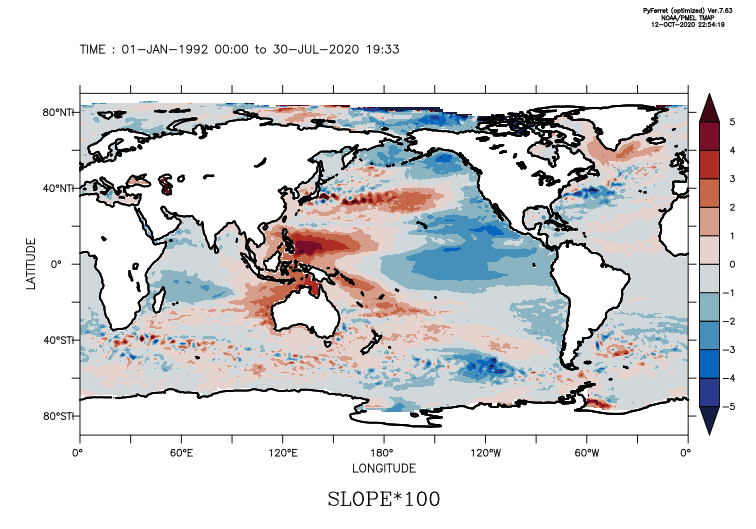

In [19]:
%%ferret
let p = npgo[l=@sbx:48,d=4] ; let q = Sla[d=1,l=@sbx:4,gt=npgo[d=4]] ; go regresst
set win/asp=.7
palette cmocean_balance
fill/lev=(-inf)(-5,5,1)(inf) slope*100 ; go land 7

#### References : 
* Di Lorenzo E, Schneider N, Cobb K, Franks P, Chhak K, Miller A, Mcwilliams J, Bograd S, Arango H, Curchitser E (2008) North Pacific Gyre Oscillation links ocean climate and ecosystem change. Geophys Res Lett 35:L08607.
* W. Han, D. Stammer, P. Thompson, T. Ezer, H. Palanisamy, X. Zhang, C. M. Domingues, L. Zhang, D. Yuan, Impacts of Basin-Scale Climate Modes on Coastal Sea Level: a Review (Springer Netherlands, 2019; https://doi.org/10.1007/s10712-019-09562-8), vol. 40.
* Mantua NJ, Hare SR, Zhang Y, Wallace JM, Francis RC (1997) A Pacific interdecadal climate oscillation with impacts on salmon production. Bull Am Meteorol Soc 78(6):1069–1079
* Zhang Y, Wallace JM, Battisti DS (1997) ENSO-like interdecadal variability: 1900–93. J Clim 10(5):1004–1020